# **Practical - 10** : Eigenfaces_PCA_SVM

> ### **Objective** : chaining PCA and Naive Bayes Clas-sifier (SVMs)

In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

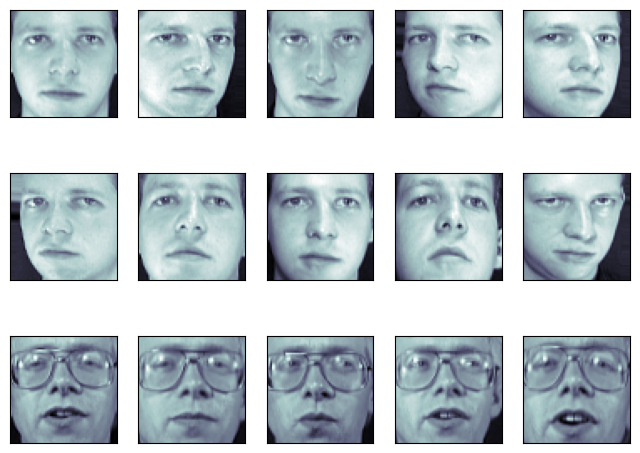

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [5]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

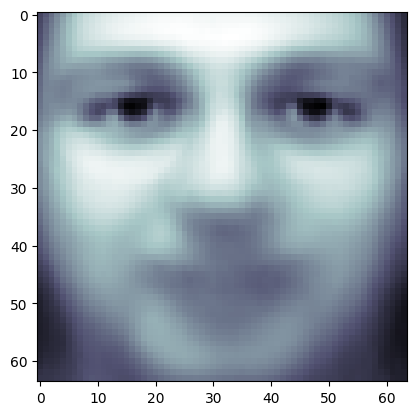

In [6]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),

cmap=plt.cm.bone)

In [7]:
print(pca.components_.shape)

(150, 4096)


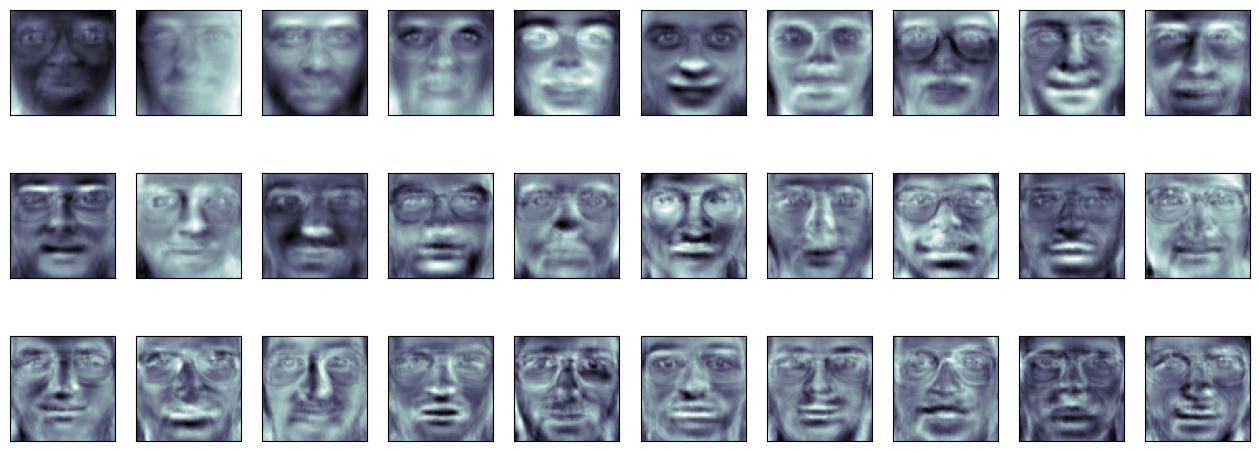

In [8]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [9]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [10]:
print(X_test_pca.shape)

(100, 150)


## **Naive Bayes Classifier(SVM/DT)**

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

In [12]:
from sklearn import svm
clf = svm.SVC(C=5.,gamma=0.001) 
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

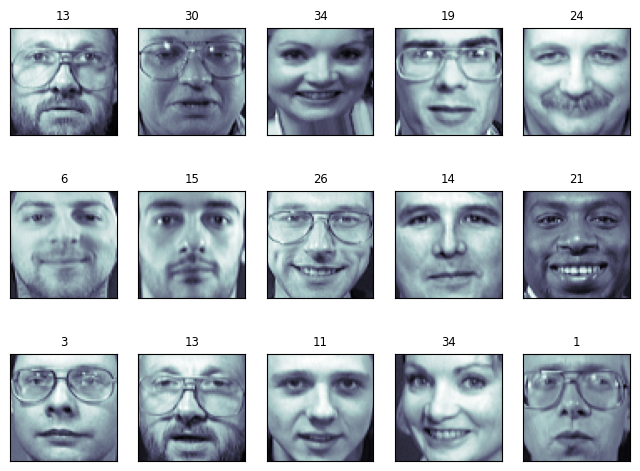

In [13]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)
  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [14]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.50      0.50      0.50         2
           3       0.14      1.00      0.25         1
           4       0.50      1.00      0.67         1
           5       1.00      0.40      0.57         5
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3
           9       0.17      1.00      0.29         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       0.80    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [15]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


## **Exercise**
### 1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive
### Bayes. Write down your observations

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(faces.data,faces.target, random_state=0)
print(X_train1.shape, X_test1.shape)

(300, 4096) (100, 4096)


In [17]:
gnb1 = GaussianNB()
gnb1.fit(X_train1, y_train1)

GaussianNB()

In [18]:
y_pred1 = gnb1.predict(X_test1)
print(y_pred1)

[13 30 34 19 24  6 15 26 14 21  3 13 11 34  1  5 20 14 20 19  9  3 12 16
 39 31  3  1 28 10  9 30 33 22  6  7  9  3  9 39 10 32 15  9 20  5 37  2
 15 23 39 14 20  9 28 31  5  3 39  4  7 27  9 35 19 37 14  0 15 31  0 26
  6  2 10  3 36 30 36 32 33  6  5 10 30 22 12 37  4 32 38 25  5  0 19 14
 13 39 12 36]


In [19]:
print(metrics.classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         2
           3       0.17      1.00      0.29         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.14      1.00      0.25         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [20]:
print(metrics.confusion_matrix(y_test1, y_pred1))

[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


### **2. Run PCA on IRIS dataset. Visualise the output in
### 2 dimensions using to Principal components. Choose different pairs of principal components and
note down your observations.**

In [21]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [22]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(iris.data,iris.target, random_state=117)
print(X_train2.shape, X_test2.shape)

(112, 4) (38, 4)


In [23]:
pca1 = decomposition.PCA(n_components=2, whiten=True)
pca1.fit(X_train2)

PCA(n_components=2, whiten=True)

In [24]:
print(pca1.components_.shape)

(2, 4)


In [25]:
X_train1_pca = pca1.transform(X_train2)
X_test1_pca = pca1.transform(X_test2)
print(X_train1_pca.shape)

(112, 2)


In [26]:
print(X_test1_pca.shape)

(38, 2)


**3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system.**

In [27]:
gnb2= GaussianNB()
gnb2.fit(X_train1_pca, y_train2)

GaussianNB()

In [28]:
y_pred2 = gnb2.predict(X_test1_pca)
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.67      1.00      0.80         8
           2       1.00      0.75      0.86        16

    accuracy                           0.89        38
   macro avg       0.89      0.92      0.89        38
weighted avg       0.93      0.89      0.90        38



In [29]:
print(metrics.confusion_matrix(y_test2, y_pred2))

[[14  0  0]
 [ 0  8  0]
 [ 0  4 12]]


In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test2, y_pred2))

Accuracy Score: 0.8947368421052632


**4. Replace Naive Bayes Classifier with Decision Tree Classifier
and then Support Vector Machine and compare performance of all three of them.**

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train1_pca, y_train2)

DecisionTreeClassifier()

In [32]:
y_pred3 = dt.predict(X_test1_pca)
print(metrics.classification_report(y_test2, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.70      0.88      0.78         8
           2       0.93      0.81      0.87        16

    accuracy                           0.89        38
   macro avg       0.88      0.90      0.88        38
weighted avg       0.91      0.89      0.90        38



In [33]:
print(metrics.confusion_matrix(y_test2, y_pred3))

[[14  0  0]
 [ 0  7  1]
 [ 0  3 13]]


In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test2, y_pred3))

Accuracy Score: 0.8947368421052632


In [35]:
clf = svm.SVC(C=5.,gamma=0.01) 
clf.fit(X_train1_pca, y_train2)

SVC(C=5.0, gamma=0.01)

In [36]:
from sklearn import metrics
y_pred4 = clf.predict(X_test1_pca)
print(metrics.classification_report(y_test2, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.57      1.00      0.73         8
           2       1.00      0.62      0.77        16

    accuracy                           0.84        38
   macro avg       0.86      0.88      0.83        38
weighted avg       0.91      0.84      0.85        38



In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test2, y_pred4))

Accuracy Score: 0.8421052631578947
